In [22]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# pip install scikit-plot or conda install scikit-plot
import scikitplot as skplt

In [23]:
# load data and print data
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()
data = StandardScaler().fit_transform(
    digits.data
)  # standardize the data (mean=0, variance=1)
X = pd.DataFrame(data=data, columns=digits.feature_names)
Y = digits.target
X

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,-0.335016,-0.043081,0.274072,-0.664478,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,0.086719,0.208293,-0.366771,-1.146647,-0.505670,-0.196008
1,0.0,-0.335016,-1.094937,0.038648,0.268751,-0.138020,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-0.249010,0.849632,0.548561,-0.505670,-0.196008
2,0.0,-0.335016,-1.094937,-1.844742,0.735366,1.097673,-0.409724,-0.125023,-0.059078,-0.624009,...,0.259230,-0.209785,-0.023596,-0.299081,-1.089383,-2.078218,-0.164037,1.565686,1.695137,-0.196008
3,0.0,-0.335016,0.377661,0.744919,0.268751,-0.844129,-0.409724,-0.125023,-0.059078,1.879691,...,1.072563,-0.209785,-0.023596,-0.299081,0.282736,0.208293,0.241430,0.379040,-0.505670,-0.196008
4,0.0,-0.335016,-1.094937,-2.551014,-0.197863,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-1.089383,-2.306869,0.849632,-0.468564,-0.505670,-0.196008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,-0.335016,-0.253452,-0.432200,0.268751,0.038508,-0.409724,-0.125023,-0.059078,-0.311047,...,0.055897,-0.209785,-0.023596,-0.299081,-0.697349,0.436944,0.646898,0.379040,-0.505670,-0.196008
1793,0.0,-0.335016,0.167290,0.980343,0.268751,0.921145,-0.108958,-0.125023,-0.059078,-0.624009,...,-0.554103,-0.209785,-0.023596,-0.299081,0.086719,0.894246,0.444164,-0.129523,-0.505670,-0.196008
1794,0.0,-0.335016,-0.884566,-0.196776,0.735366,-0.844129,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.757436,-0.209785,-0.023596,-0.299081,-0.697349,-0.706312,0.241430,-0.129523,-0.505670,-0.196008
1795,0.0,-0.335016,-0.674195,-0.432200,-1.131092,-1.020657,-0.409724,-0.125023,-0.059078,-0.624009,...,-0.350769,-0.209785,-0.023596,-0.299081,-0.109298,-0.020358,0.849632,0.887602,-0.505670,-0.196008


In [24]:
from sklearn.neighbors import KNeighborsClassifier


def knn_accuracy(k, x_train, x_test, y_train, y_test):
    """
    Helper method, creates the knn classifier, trains it using our test data and return its accuracy
    """
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(x_train, y_train)  # train model
    y_pred = clf.predict(x_test)  # y  pred
    y_score = clf.predict_proba(x_test)
    return clf.score(x_test, y_test), y_pred, y_score

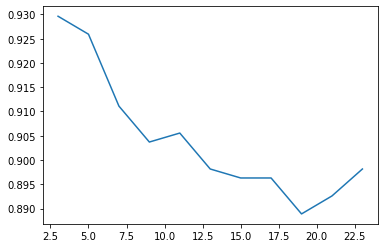

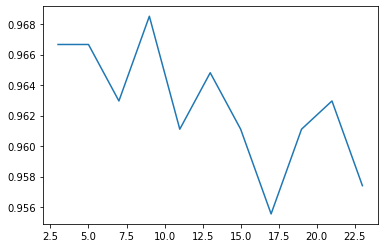

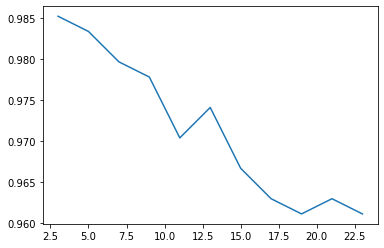

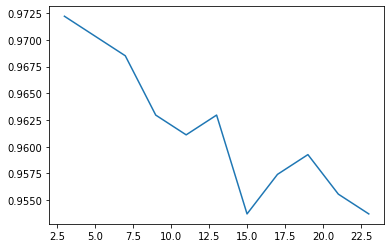

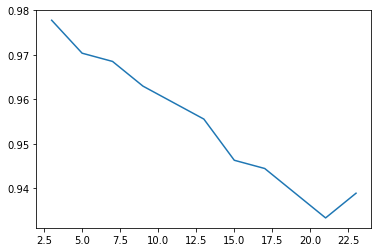

In [25]:
k_range = range(3, 25, 2)  # each odd number between 1 and 15
n_components = [10, 20, 40, 60, 64]
for n in n_components:
    pca = PCA(n_components=n)
    X_ = pca.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X_, Y, test_size=0.30)
    accuracies = [knn_accuracy(k, x_train, x_test, y_train, y_test)[0] for k in k_range]
    acc_df = pd.DataFrame(accuracies, columns=["accuracy"], index=k_range)
    plt.plot(k_range, accuracies, label="Test Accuracy")
    plt.show()
    acc_df.to_csv(f"{n}_knn_mnist.csv")
    acc_df

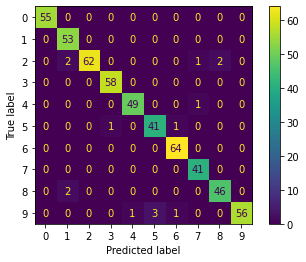

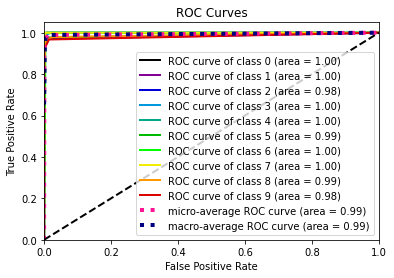

In [30]:
# plot Confusion Matrix & ROC
from sklearn.metrics import ConfusionMatrixDisplay


_, y_pred, y_score = knn_accuracy(3, x_train, x_test, y_train, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
skplt.metrics.plot_roc(y_test, y_score)
plt.show()

SVM Classifier 

In [27]:
from sklearn import svm


def svm_accuracy(kernel, C, x_train, x_test, y_train, y_test):
    """
    Helper method, creates the svm classifier, trains it using our test data and return its accuracy
    """
    clf = svm.SVC(kernel=kernel, C=C, probability=True)
    clf.fit(x_train, y_train)  # train model
    y_score = clf.predict_proba(x_test)
    y_pred = clf.predict(x_test)  # y  pred
    return clf.score(x_test, y_test), y_pred, y_score

In [28]:
import itertools

kernels = ["linear", "poly", "rbf", "sigmoid"]
C = [0.001, 0.01, 1, 10, 100, 1000]
pairs = list(itertools.product(kernels, C))  # all possible options
n_components = [10, 20, 40, 60, 64]
for n in n_components:
    pca = PCA(n_components=n)
    X_ = pca.fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X_, Y, test_size=0.30)
    accuracies = [
        svm_accuracy(k, c, x_train, x_test, y_train, y_test)[0] for k, c in pairs
    ]
    acc_df = pd.DataFrame(pairs, columns=["Kernels", "Cost"])
    acc_df["Accuracy"] = accuracies
    acc_df.to_csv(f"{n}_svm_mnist.csv")

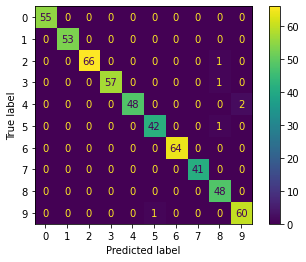

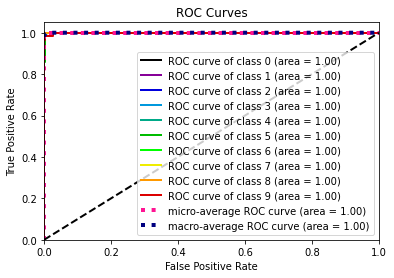

In [31]:
_, y_pred, y_score = svm_accuracy("poly", 10, x_train, x_test, y_train, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
skplt.metrics.plot_roc(y_test, y_score)
plt.show()